<a href="https://colab.research.google.com/github/TranTan1306/BaiTapAI/blob/main/50_Startups_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

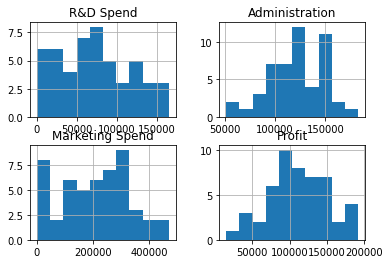

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = '/content/50_Startups.csv'
data = pd.read_csv(url)
data.head()
data.hist()
plt.show()

In [12]:
correlations = data.corr()
correlations

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

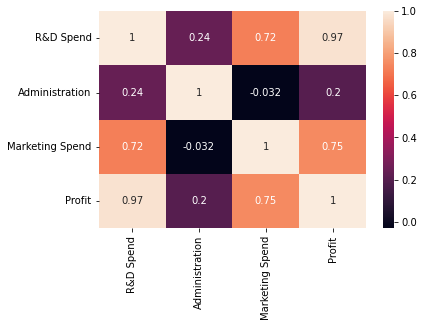

In [13]:
import seaborn as sns
sns.heatmap(correlations, annot=True)

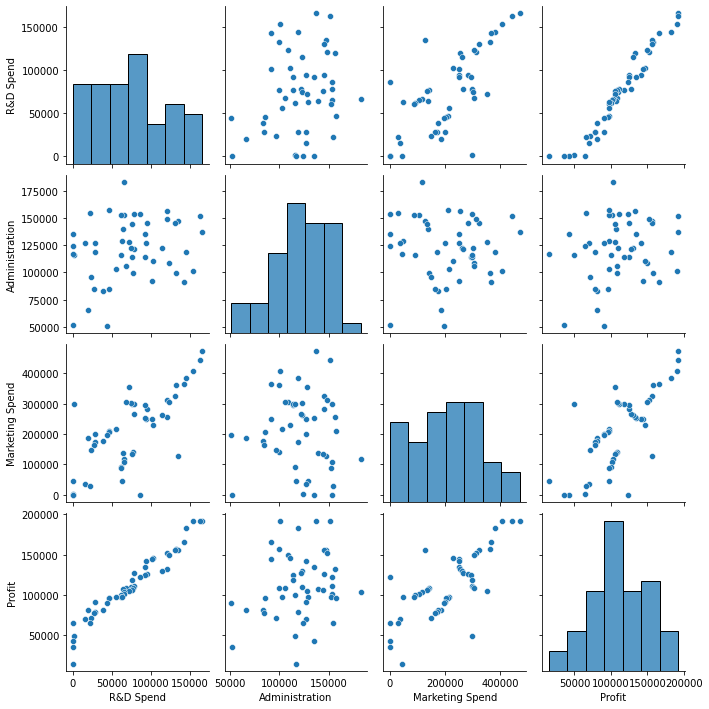

In [15]:
sns.pairplot(data)

In [17]:
from sklearn import linear_model
model = linear_model.LinearRegression()

LinearRegression()

In [18]:
# intercept
model.intercept_

49032.89914125215

In [22]:
# coefficient
print(model.coef_)

[0.85429137]


In [23]:
# accuracy
model.score(X = pd.DataFrame(data['R&D Spend']), y = data['Profit'])

0.9465353160804393

In [25]:
# prediction
y_pred = model.predict(X = pd.DataFrame(data['R&D Spend']))
print(y_pred)

[190289.29389289 187938.71118575 180116.65707807 172369.00320589
 170433.97345032 161694.19683741 164033.72501421 160345.46724972
 152011.33380847 154396.82286103 136096.36397105 135036.08586475
 129219.89081021 127621.20411029 151499.37407569 146869.43093301
 115678.82583435 129897.69412683 127413.41482014 122860.50313037
 114175.91374003 116000.34693472 112245.81324567 106725.35677792
 114850.93206678 104275.40289851 113385.70276482 110633.79960036
 105460.14271464 105079.09459155 101994.24845109 101261.18102569
 103202.54108032  96440.90176556  88694.29012885  88342.27936946
  73520.10196791  86681.47714396  66314.86331588  81973.10151051
  73597.47513738  72861.58000754  69229.14164122  62279.31048036
  67979.15105018  49887.38699921  50156.68526807  49032.89914125
  49495.96777887  49032.89914125]


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


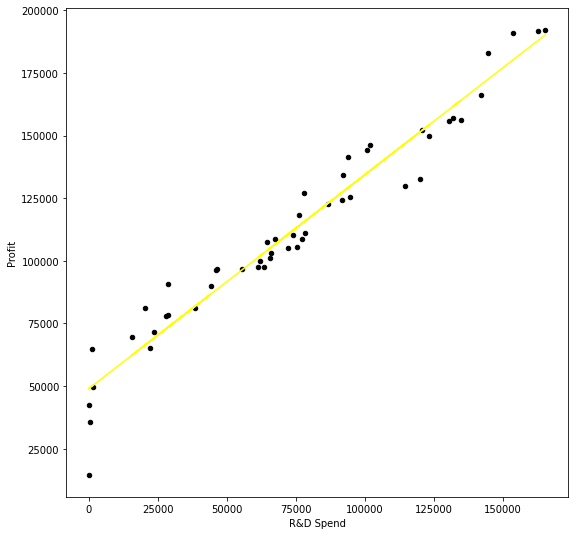

In [26]:
# sketch the graph
data.plot(kind = 'scatter', x = 'R&D Spend', y = 'Profit', figsize=(9,9), color = 'black')
plt.plot(data['R&D Spend'], y_pred, color='yellow')

In [27]:
# 2nd order
model=linear_model.LinearRegression()
X=pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2]).T
model.fit(X,y=data['Profit'])
print('Intercept:',model.intercept_)
print('Coeffient:',model.coef_)
print('Accuracy:',model.score(X,data['Profit']))

Intercept: 48128.14916956878
Coeffient: [ 8.90147291e-01 -2.31821806e-07]
Accuracy: 0.946703652909133


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


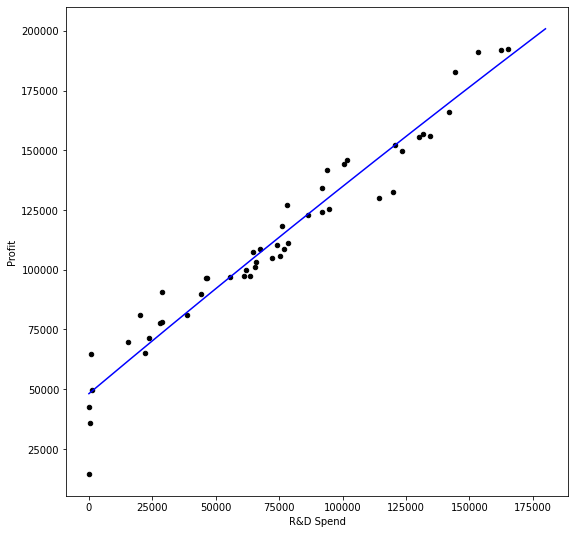

In [30]:
range=np.arange(0,180000,0.1)
x_range=pd.DataFrame([range,range**2]).T
y_pred=model.predict(X=x_range)
data.plot(kind='scatter',
          x='R&D Spend',
          y='Profit',
          figsize=(9,9),
          color='black')
plt.plot(range,y_pred,color='blue')

In [36]:
model = linear_model.LinearRegression()
X = pd.DataFrame(data.loc[:,['R&D Spend','Administration']])
model.fit(X=data.loc[:,['R&D Spend','Administration']], y =data['Profit'])
print('Intercept:', model.intercept_)
print('coeffient:', model.coef_)
print('Accuracy:',model.score(X,data['Profit']))

Intercept: 54886.62062756297
coeffient: [ 0.86211798 -0.05299543]
Accuracy: 0.9478129385009173


In [32]:
# 3rd order
model=linear_model.LinearRegression()
X=pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2,data['R&D Spend']**3]).T
model.fit(X,y=data['Profit'])
print('Intercept:',model.intercept_)
print('Coeffient:',model.coef_)
print('Accuracy:',model.score(X,data['Profit']))

Intercept: 43108.76756818297
Coeffient: [ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]
Accuracy: 0.9540709421464032


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


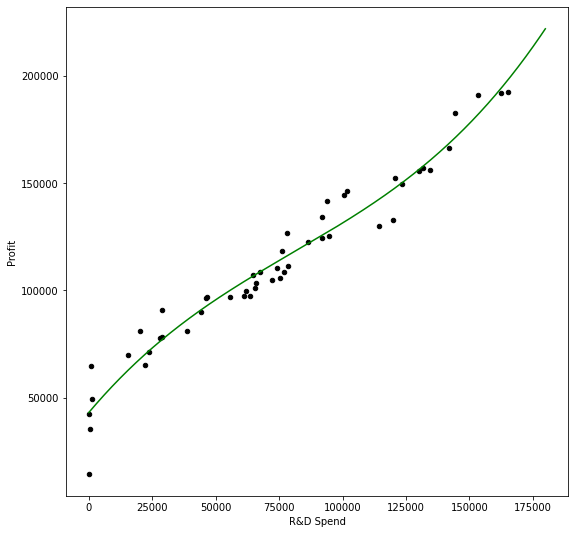

In [33]:
range=np.arange(0,180000,100)
x_range=pd.DataFrame([range,range**2,range**3]).T
y_pred=model.predict(X=x_range)
data.plot(kind='scatter',
          x='R&D Spend',
          y='Profit',
          figsize=(9,9),
          color='black')
plt.plot(range,y_pred,color='green')